Probelem Statement - To find the probability of clients to subscribe to a Term Deposit

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [91]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [92]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [93]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [94]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

On comparing the train dataset and test datase, we conclude, that the "subscribed" is our Target Variable, which is categorical  in nature

In [95]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

we can see that values types are either int64 or object type. object refers to string values where as int64 represents integer form 

Text(0, 0.5, 'Frequency')

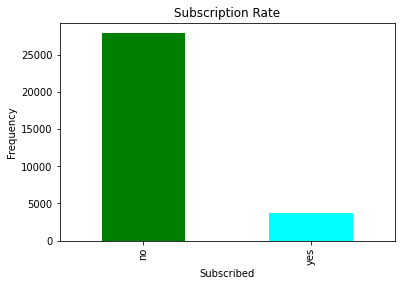

In [96]:
subsc = train['subscribed'].value_counts().plot.bar(color = ['green','cyan'])
subsc.set_title('Subscription Rate')
subsc.set_xlabel('Subscribed')
subsc.set_ylabel('Frequency')

from this graph we can see that out of our total clients about 12% have subscribed to term loans

Text(0.5, 0, 'Age')

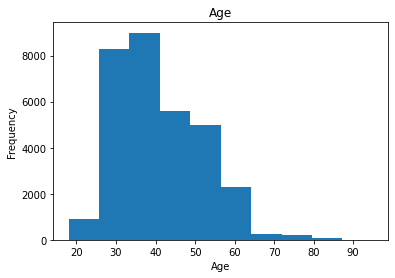

In [97]:
age = train['age'].plot.hist()
age.set_title('Age')
age.set_xlabel('Age')

this graph shows that the most of the clients of the bank are people with age between 25-65 

In [98]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Text(0.5, 1.0, 'Job Type')

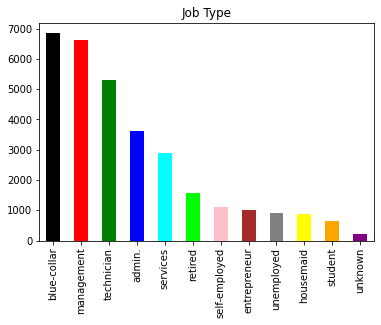

In [99]:
colors = ['black', 'red', 'green', 'blue', 'cyan','lime','pink','brown','grey','yellow','orange','purple']
hist = train['job'].value_counts().plot.bar(color=colors)
hist.set_title('Job Type')

we can conclude that our maximum clients are of working a blue-collar, management or technician jobs

In [100]:
train['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

Text(0, 0.5, 'Probability')

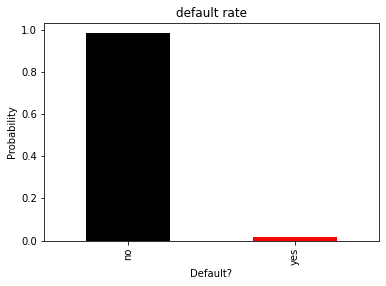

In [101]:
default = train['default'].value_counts(normalize=True).plot.bar(color = colors)
default.set_title('default rate')
default.set_xlabel('Default?')
default.set_ylabel('Probability')

we can also say that most of our clients ( about 98% ) do not default where as the other 2% are defaulters

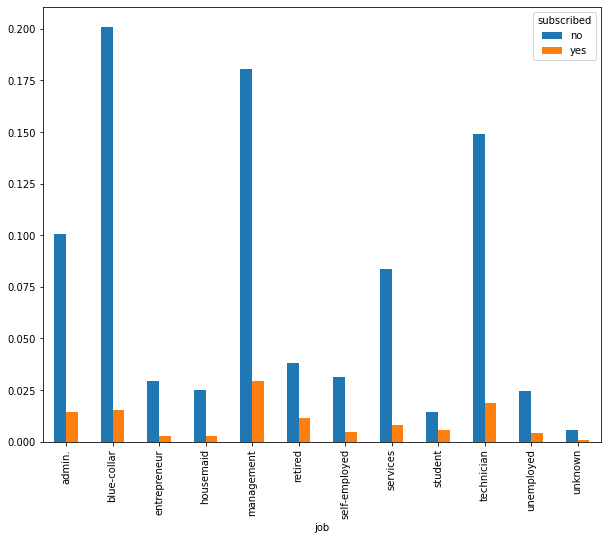

In [102]:
crs_tb = pd.crosstab(train['job'],train['subscribed'],normalize=True)
crs_tb = crs_tb.plot.bar(figsize=(10,8))


we can see that people working in management, blue-collar job, technicians and retired people have shown more interest to subscribing to term loans


where as students also show keen intrest, but generally students dont go for term deposits and we also dont have enough student clients 

In [103]:
pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


about 41 people who have subscribed for the term deposit have previous default history also people with no or less default history have higher chances of subscribing to a term deposit. 
and clearly since many people have not subscribed to any term loans before, then consequently, they never had any default history

In [104]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

In [105]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [106]:
corr = train.corr()

<AxesSubplot:>

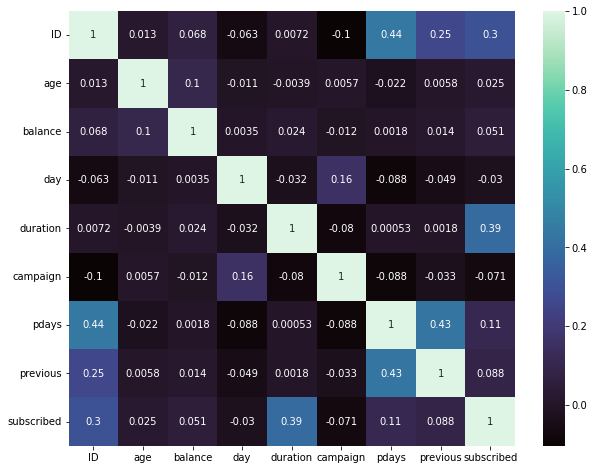

In [107]:
import seaborn as sn
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.heatmap(corr,annot=True,cmap="mako")


we can see that call duration has a very high correlation with subscribed, to put it in simpler terms, as the duration of the call increases with a person he/she is more likely to subscribe as long call indicates that the person is showing intrest in the conversation in this case, to make term loans

In [109]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


the string format of months was really annoying. hence i convert them to their respective month numbers

In [110]:
MoNtHs = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_num = [1,2,3,4,5,6,7,8,9,10,11,12]

In [111]:
train['month'].replace(MoNtHs,month_num,inplace=True)

In [112]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,11,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,7,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,7,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,6,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,2,380,1,-1,0,unknown,0


now the month column is in number format

now to treat the rest of the categorical variables into continous variables

In [113]:
train = pd.get_dummies(train)

In [114]:
train_ind = train.drop('subscribed',axis=1)
train_depnd = train['subscribed']


In [115]:
from sklearn.model_selection import train_test_split


In [116]:
x_train ,x_eval, y_train, y_eval = train_test_split(train_ind, train_depnd,random_state = 101, stratify= train_depnd )

now we have our independant and dependant variables separated out and training and evaluation datasets made we can proceed with the model building

since this is a classification problem, we will use Logisitic regression on the data

In [117]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [118]:
logreg.fit(x_train,y_train)

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
pred = logreg.predict(x_eval)

In [120]:
logreg.score(x_eval,y_eval)

0.8891557128412538

score() function in Logistic Regression returns accuracy 

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_eval,pred)

0.8891557128412538

In [122]:
test['month'].replace(MoNtHs,month_num,inplace=True)

In [123]:
test = pd.get_dummies(test)

In [124]:
Log_reg_pred = logreg.predict(test)

In [125]:
df_LRPred = pd.DataFrame()
df_LRPred['ID'] = test['ID']
df_LRPred['subscribed'] = Log_reg_pred 

In [126]:
df_LRPred['subscribed'].replace(0,'no',inplace=True)
df_LRPred['subscribed'].replace(1,'yes',inplace=True)

In [127]:
df_LRPred.to_csv('submission.csv')

the final file has been saved as submission.csv in the same folder that we started working on